# HW9: Time Series Analysis

## Syed Nisar Hussain

### sh07126@st.habib.edu.pk


In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("karachi-weather-2021-2023.csv", parse_dates=['datetime'])
df.head()

,datetime,temp
0,2021-01-01,15.0
1,2021-01-02,15.4
2,2021-01-03,15.6
3,2021-01-04,16.3
4,2021-01-05,17.1


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y')
df = df.set_index('datetime')

### Part 1: Aggregate by Weekly Mean


In [4]:
weekly_data = df.resample('W').mean()
weekly_data.head()

,temp
datetime,
2021-01-03,15.333333
2021-01-10,16.028571
2021-01-17,17.085714
2021-01-24,19.457143
2021-01-31,17.800000


### Part 2: Visulaizing the data


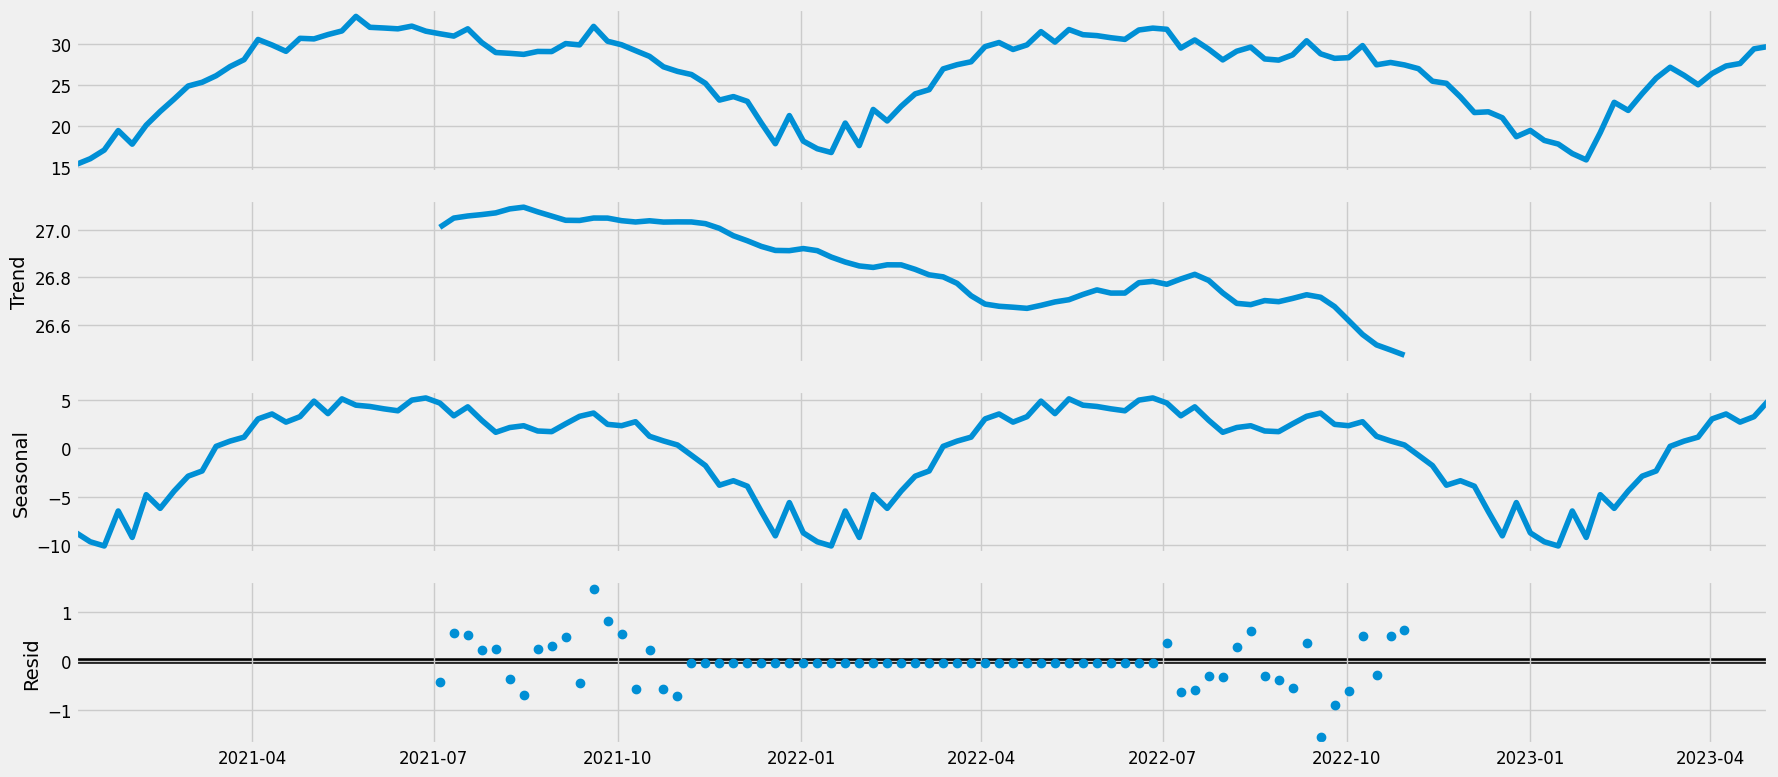

In [5]:
decomposition = sm.tsa.seasonal_decompose(weekly_data, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

**Insights:** The trend component shows an overall fluctuation in temperature levels, with periods of both increasing and decreasing temperatures over the time period. The seasonal component exhibits a clear cyclical pattern, likely corresponding to the seasonal changes throughout the year, with higher temperatures in summer and low in winters. This suggests that temperature in Karachi follows a regular seasonal variation. The residual component is fairly consistent, remaining closer to 0, however there is presence of some irregular, non-systematic variations in temperature that are not fully explained by the trend and seasonal patterns.


### Part 3: Train/Test Split


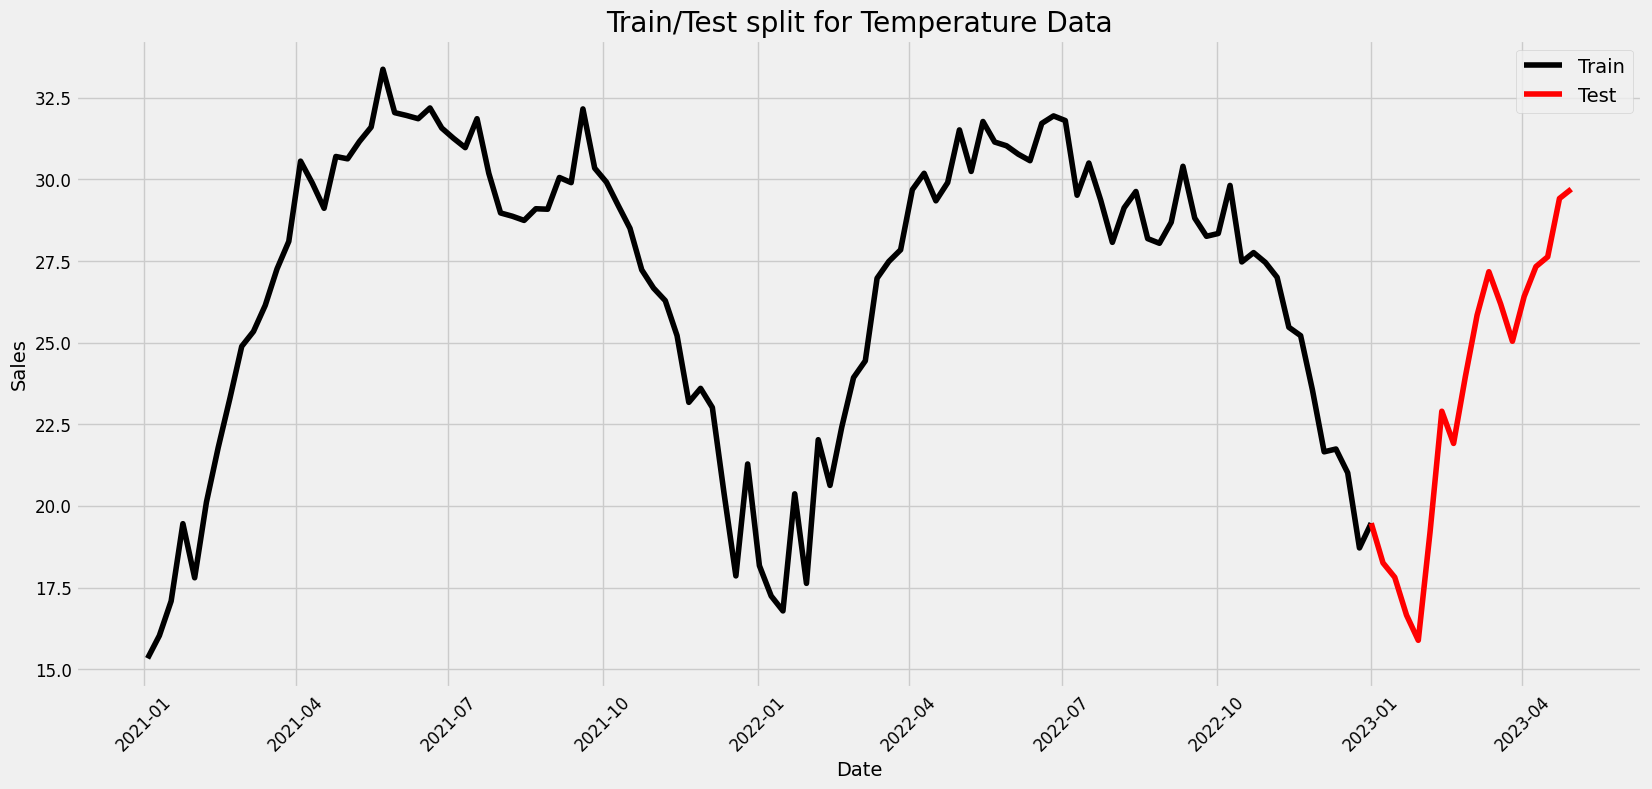

In [6]:
train = weekly_data[weekly_data.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = weekly_data[weekly_data.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temperature Data")
plt.legend()
plt.show()

### Part 4: ARIMA


In [7]:
p_values = range(0, 5)  
d_values = range(0, 2)  
q_values = range(0, 5)  

best_aic = float("inf")
best_rmse = float("inf")
best_orderaic = None
best_orderrmse = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model for each combination of p, d, q
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                
                # Calculate AIC
                aic = model_fit.aic
                
                # Forecast on the test set
                predictions = model_fit.forecast(steps=len(test))
                
                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(test, predictions))
                
                # Check if this model is better based on AIC and RMSE
                if aic < best_aic:
                    best_aic = aic
                    best_orderaic = (p, d, q)
                    
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_orderrmse = (p, d, q)
                
                print(f'ARIMA({p},{d},{q}) - AIC: {aic:.2f}, RMSE: {rmse:.4f}')
                
            except Exception as e:
                continue

# Step 5: Output the best model's parameters
print("\nBest ARIMA Model:")
print(f"by RMSE: {best_orderrmse}")
print(f"by AIC: {best_orderaic}")

ARIMA(0,0,0) - AIC: 623.21, RMSE: 5.5535
ARIMA(0,0,1) - AIC: 536.33, RMSE: 5.3576
ARIMA(0,0,2) - AIC: 470.48, RMSE: 5.2468
ARIMA(0,0,3) - AIC: 457.24, RMSE: 5.0825
ARIMA(0,0,4) - AIC: 418.95, RMSE: 4.5356
ARIMA(0,1,0) - AIC: 370.35, RMSE: 5.8637
ARIMA(0,1,1) - AIC: 370.45, RMSE: 5.9000
ARIMA(0,1,2) - AIC: 365.63, RMSE: 6.3242
ARIMA(0,1,3) - AIC: 356.23, RMSE: 6.4379
ARIMA(0,1,4) - AIC: 351.23, RMSE: 6.3141
ARIMA(1,0,0) - AIC: 379.28, RMSE: 5.0306
ARIMA(1,0,1) - AIC: 379.67, RMSE: 5.3337
ARIMA(1,0,2) - AIC: 374.91, RMSE: 5.6702
ARIMA(1,0,3) - AIC: 365.32, RMSE: 5.5463
ARIMA(1,0,4) - AIC: 359.71, RMSE: 4.8694
ARIMA(1,1,0) - AIC: 369.59, RMSE: 5.9343
ARIMA(1,1,1) - AIC: 368.52, RMSE: 5.9551
ARIMA(1,1,2) - AIC: 346.02, RMSE: 8.6753
ARIMA(1,1,3) - AIC: 347.95, RMSE: 8.4645
ARIMA(1,1,4) - AIC: 351.18, RMSE: 6.2157
ARIMA(2,0,0) - AIC: 378.89, RMSE: 5.4363
ARIMA(2,0,1) - AIC: 377.66, RMSE: 5.3047
ARIMA(2,0,2) - AIC: 379.66, RMSE: 5.3152
ARIMA(2,0,3) - AIC: 351.41, RMSE: 2.6921


c:\Users\NISAR SYED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,0,4) - AIC: 348.64, RMSE: 1.7042
ARIMA(2,1,0) - AIC: 367.71, RMSE: 6.1547
ARIMA(2,1,1) - AIC: 356.96, RMSE: 9.8909
ARIMA(2,1,2) - AIC: 347.96, RMSE: 8.4933
ARIMA(2,1,3) - AIC: 349.12, RMSE: 8.9405
ARIMA(2,1,4) - AIC: 349.98, RMSE: 8.0629
ARIMA(3,0,0) - AIC: 376.60, RMSE: 5.1248
ARIMA(3,0,1) - AIC: 379.66, RMSE: 5.3199


c:\Users\NISAR SYED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,2) - AIC: 371.79, RMSE: 1.8588
ARIMA(3,0,3) - AIC: 352.24, RMSE: 2.7099
ARIMA(3,0,4) - AIC: 353.98, RMSE: 2.6599
ARIMA(3,1,0) - AIC: 363.21, RMSE: 6.9643
ARIMA(3,1,1) - AIC: 353.96, RMSE: 10.2694
ARIMA(3,1,2) - AIC: 349.64, RMSE: 8.6280
ARIMA(3,1,3) - AIC: 350.50, RMSE: 8.4375


c:\Users\NISAR SYED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,4) - AIC: 347.32, RMSE: 7.9532
ARIMA(4,0,0) - AIC: 371.30, RMSE: 4.6579
ARIMA(4,0,1) - AIC: 354.81, RMSE: 2.8824
ARIMA(4,0,2) - AIC: 380.82, RMSE: 5.3739
ARIMA(4,0,3) - AIC: 354.13, RMSE: 2.6882


c:\Users\NISAR SYED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4,0,4) - AIC: 351.21, RMSE: 2.4286
ARIMA(4,1,0) - AIC: 342.89, RMSE: 9.2018
ARIMA(4,1,1) - AIC: 344.79, RMSE: 9.4295
ARIMA(4,1,2) - AIC: 346.70, RMSE: 9.2153
ARIMA(4,1,3) - AIC: 348.48, RMSE: 8.9662
ARIMA(4,1,4) - AIC: 349.44, RMSE: 8.3268

Best ARIMA Model:
by RMSE: (2, 0, 4)
by AIC: (4, 1, 0)


c:\Users\NISAR SYED\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


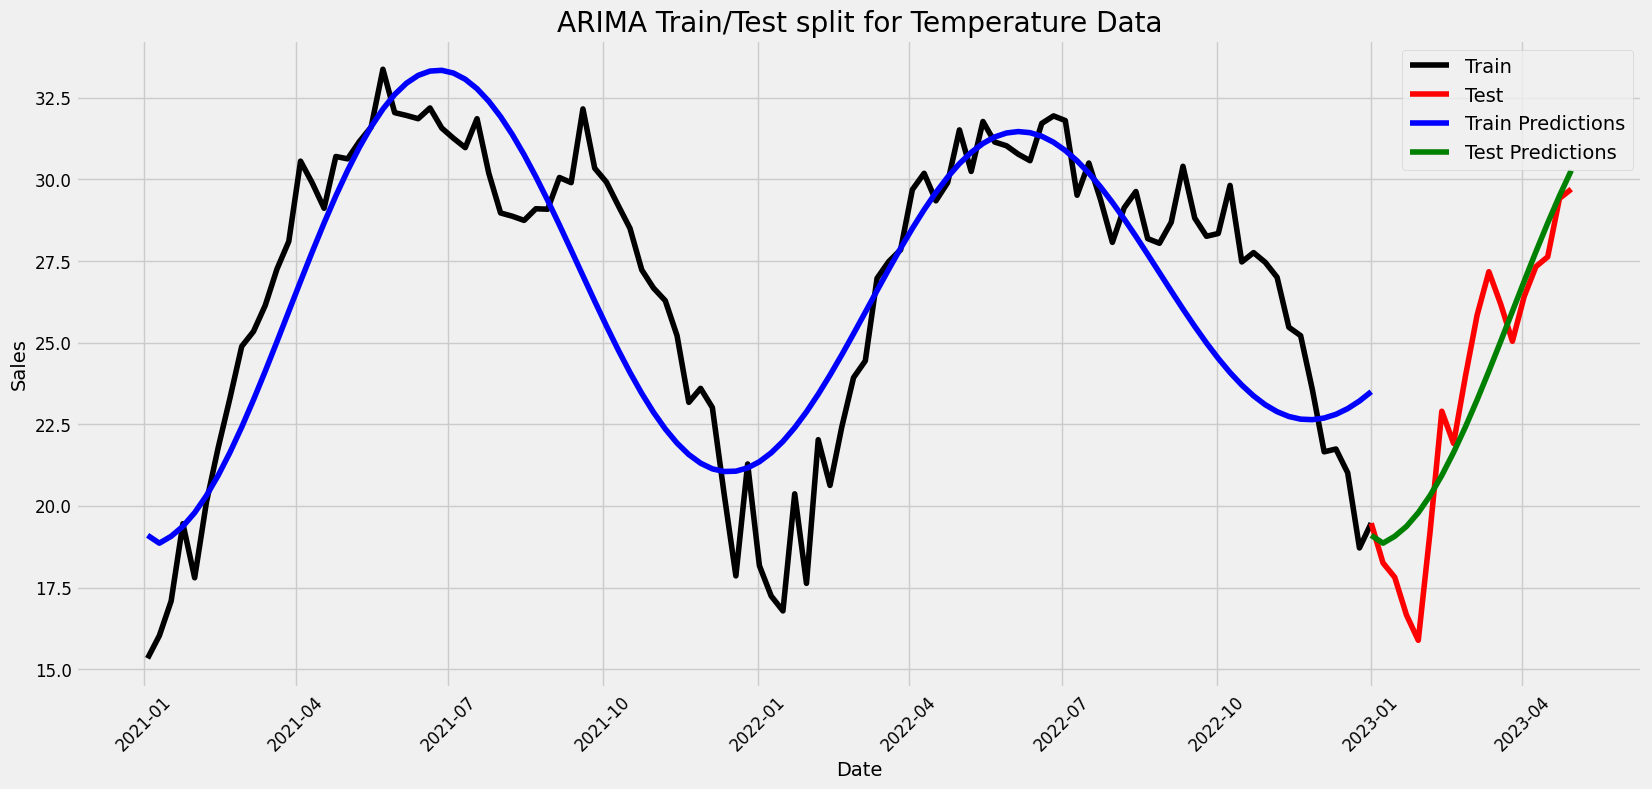

RMSE:  1.7042101953793907
AIC:  348.63764245261507


In [8]:
ARIMAmodel = ARIMA(train, order = (2, 0, 4))

ARIMAmodel = ARIMAmodel.fit()

#Train set prediction
y_pred_train = ARIMAmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05)
y_pred_df_train["Predictions"] = ARIMAmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = ARIMAmodel.get_forecast(len(test.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("ARIMA Train/Test split for Temperature Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
print("AIC: ", ARIMAmodel.aic)

In [9]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(2, 0, 4)   Log Likelihood                -166.319
Date:                Mon, 11 Nov 2024   AIC                            348.638
Time:                        10:08:11   BIC                            369.869
Sample:                    01-03-2021   HQIC                           357.241
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6864      0.269     99.088      0.000      26.159      27.214
ar.L1          1.9705      0.011    179.245      0.000       1.949       1.992
ar.L2         -0.9866      0.010    -98.216      0.0

**Insights:** Based on the RMSE and AIC values, the optimal parameters chosen for ARIMA are (2,0,4). Even though the minimum AIC value (342.89) was achieved with (4,1,0), but with that RMSE Value was much higher (9.2). The current configuration seems the most optimal as it gives least RMSE (1.70)and a low AIC value (348.63) and the visualization also backs that. The predictions although not very accurate, do follow the nature of the actual data which suggests that this ARIMA model at least captured a little bit of relevant information from the data.


### Part 5/6: SARIMA


In [10]:
p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, D, Q))]

# Grid search over parameter combinations
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Fit SARIMA model
            model = SARIMAX(train, order=param, seasonal_order=param_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()

            # Forecast for the test set
            forecast = results.get_forecast(len(test.index))
            forecast_df = forecast.conf_int(alpha=0.05)
            forecast_df["Predictions"] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test.values, forecast_df["Predictions"]))

            # Print AIC and RMSE for each combination
            print(f'SARIMAX{param}x{param_seasonal} - AIC: {results.aic:.4f}, RMSE: {rmse:.4f}')

        except Exception as e:
            print(f'SARIMAX{param}x{param_seasonal} - Model failed to fit. Error: {e}')
            continue


SARIMAX(0, 0, 0)x(1, 1, 1, 52) - AIC: 6.0000, RMSE: 2.5027
SARIMAX(0, 0, 1)x(1, 1, 1, 52) - AIC: 8.0000, RMSE: 2.4997
SARIMAX(0, 1, 0)x(1, 1, 1, 52) - AIC: 6.0000, RMSE: 3.4608
SARIMAX(0, 1, 1)x(1, 1, 1, 52) - AIC: 8.0000, RMSE: 2.7146
SARIMAX(1, 0, 0)x(1, 1, 1, 52) - AIC: 8.0000, RMSE: 2.4961
SARIMAX(1, 0, 1)x(1, 1, 1, 52) - AIC: 10.0000, RMSE: 128.0640
SARIMAX(1, 1, 0)x(1, 1, 1, 52) - AIC: 8.0000, RMSE: 2.4856
SARIMAX(1, 1, 1)x(1, 1, 1, 52) - AIC: 10.0000, RMSE: 2.7031


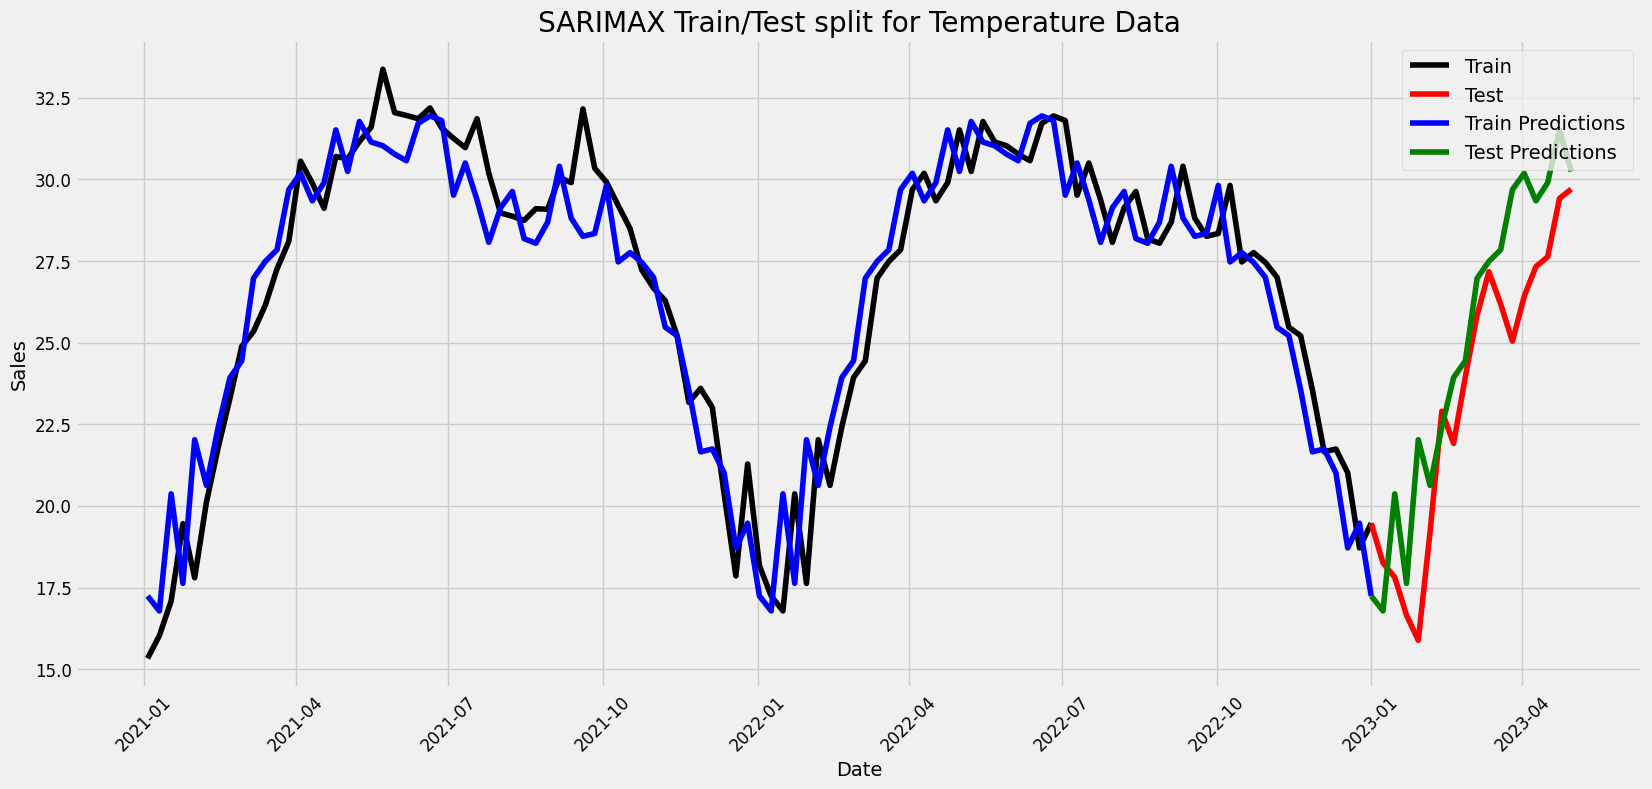

RMSE:  2.5026516549696742
AIC:  6.0


In [11]:
SARIMAXmodel = SARIMAX(train, order=(0, 0, 0),seasonal_order=(1, 1, 1, 52),enforce_stationarity=False, enforce_invertibility=False) 
SARIMAXmodel = SARIMAXmodel.fit()

#Train set prediction
y_pred_train = SARIMAXmodel.get_forecast(len(train.index)) #only providing dates (train.index) from train as input for forecasting
y_pred_df_train = y_pred_train.conf_int(alpha = 0.05) 
y_pred_df_train["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_train.index[0], end = y_pred_df_train.index[-1])

#for training prediction plotting purposes
y_pred_df_train.index = train.index
y_pred_out_train = y_pred_df_train["Predictions"] 

#Test set prediction
y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for testing prediction plotting purposes
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("SARIMAX Train/Test split for Temperature Data")

plt.plot(y_pred_out_train, color='blue', label = 'Train Predictions')

plt.plot(y_pred_out, color='green', label = 'Test Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
print("AIC: ", SARIMAXmodel.aic)

In [12]:
print(SARIMAXmodel.summary())

                                 SARIMAX Results                                  
Dep. Variable:                       temp   No. Observations:                  105
Model:             SARIMAX(1, 1, [1], 52)   Log Likelihood                   0.000
Date:                    Mon, 11 Nov 2024   AIC                              6.000
Time:                            10:08:46   BIC                               -inf
Sample:                        01-03-2021   HQIC                               nan
                             - 01-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52            0        nan        nan        nan         nan         nan
ma.S.L52            0        nan        nan        nan         nan         nan
sigma2         1.612

**Insights:** Based on the grid search, the optimal paramters for SARIMA turn out to be (0, 0, 0)x(1, 1, 1, 52). These paramters ensure the least AIC value (6.0), along with a very low RMSE value (2.50). Moreover, from the visualization it can be observed that SARIMA captures the variations in the data, quite closely and therefore the predictions line plot looks much similar to the original data. This can also explains the significantly lower AIC value as compared to that of ARIMA model. In general, SARIMA is the better pick over ARIMA since, we can see SARIMA tracks the data more closely by taking into account the seasonal patterns, and its performance by numbers also backs that up. Whereas ARIMA fails to take into account seasonal changes at all.


### Part 7: Machine Learning


In [13]:
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.temp

# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.temp

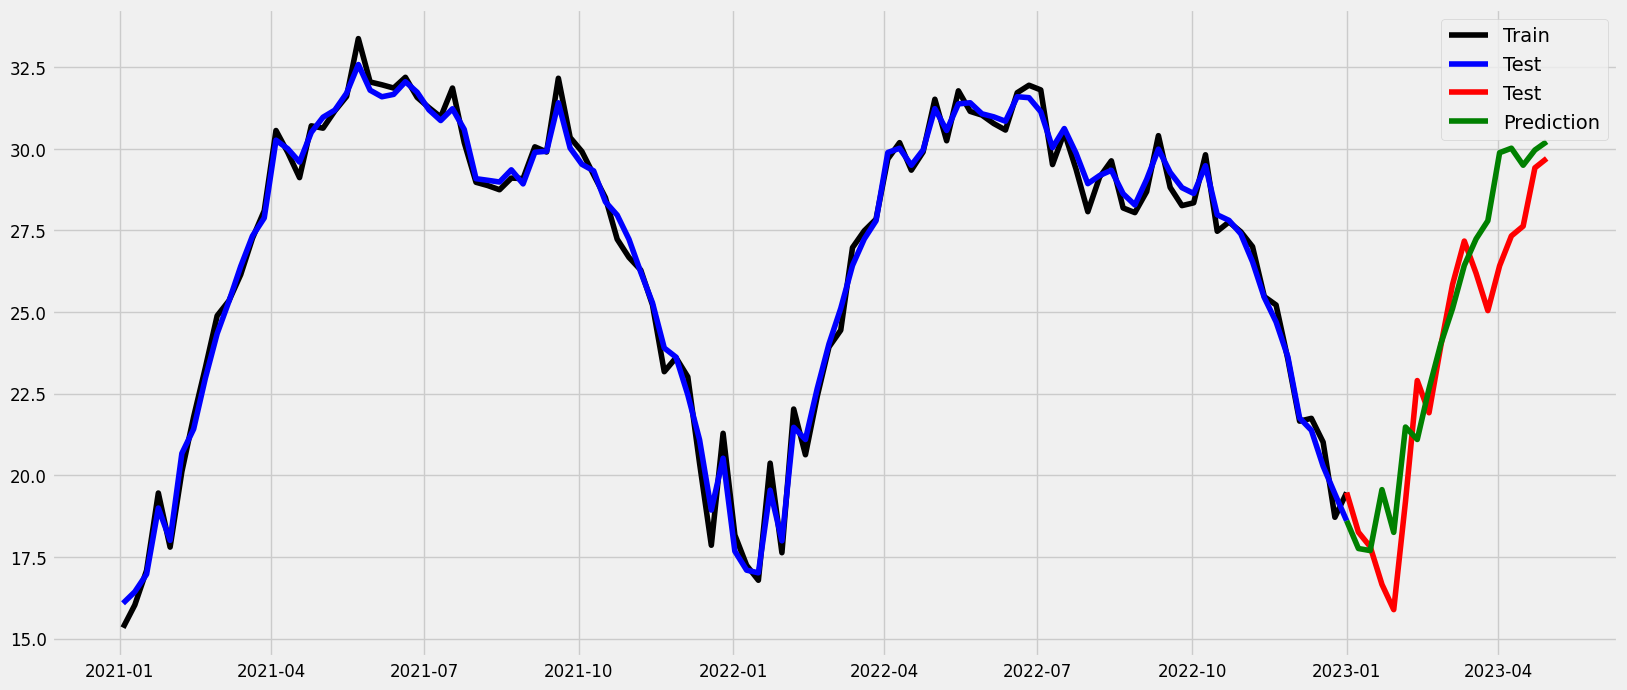

RMSE:  1.780364371176509


In [14]:
# fit the model
rfmodel = RandomForestRegressor(random_state=123)
rfmodel.fit(X,Y)

# predict for the test set period
preds_train = rfmodel.predict(X)

# predict for the test set period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index.values, Y.values,color="black", label='Train')
plt.plot(train.index.values, preds_train,color="blue", label='Test')
plt.plot(test.index.values, testY.values,color="red", label='Test')
plt.plot(test.index.values, preds, color="green",label='Prediction')
plt.legend()
plt.show()

rf_rmse = np.sqrt(mean_squared_error(testY, preds))
print("RMSE: ",rf_rmse)

**Insights:** The Random Forest model gives us a very low RMSE value of 1.78 which indicates that it performs excellent for the given data. Moreover, from the visualization we can observe that the random forest model was able to catch the variations in the data very closely and so the predictions plot is much closer the original data. In general, the model has learned well from the data and therefore, is able to make relatively accurate predictions as well.


### Part 8: Model Comparision


ARIMA performs good with our data, resulting in the lowest RMSE value among all the models. This indicates a decent performance however, ARIMA fails to capture seasonal trends, moreover its AIC value is much higher than SARIMA. Therefore, even though it gives the lowest RMSE value, it is overall not the most ideal pick for working with our data.

SARIMA does make up for where ARIMA is lacking and that is in capturing the seasonal variations of the data. SARIMA also has similarly low RMSE value as ARIMA along with a very low AIC value. Therefore, in comparision with ARIMA, its mix of both scores is much better moreover it is able to pick on the changes in the data, and so it is preferred over SARIMA for this data.

Finally, the Random Forest model also has a very low RMSE value, lower than that of SARIMA, but slightly higher than ARIMA. This tells us that Random Forest model is also very good pick. If we analyze the plots carefully, we can observe that Random Forest is the most similar to the actual data, this shows the power of machine learning, provided with enough data ML models can learn very complex patterns and perform extremely well. Based on these reasons, I believe Random Forest is the best model to go for, with SARIMA being a decent second option.


### Part 9: Forecast with SARIMA


In [15]:
future_dates = pd.date_range(start='2024-11-01', end='2024-12-31', freq='W')

Predictions:
 2024-11-03    26.916299
2024-11-10    25.441296
2024-11-17    24.974900
2024-11-24    23.562165
2024-12-01    21.816174
2024-12-08    21.582151
2024-12-15    20.644327
2024-12-22    19.015609
2024-12-29    19.296956
2025-01-05    18.128394
Freq: W-SUN, Name: predicted_mean, dtype: float64


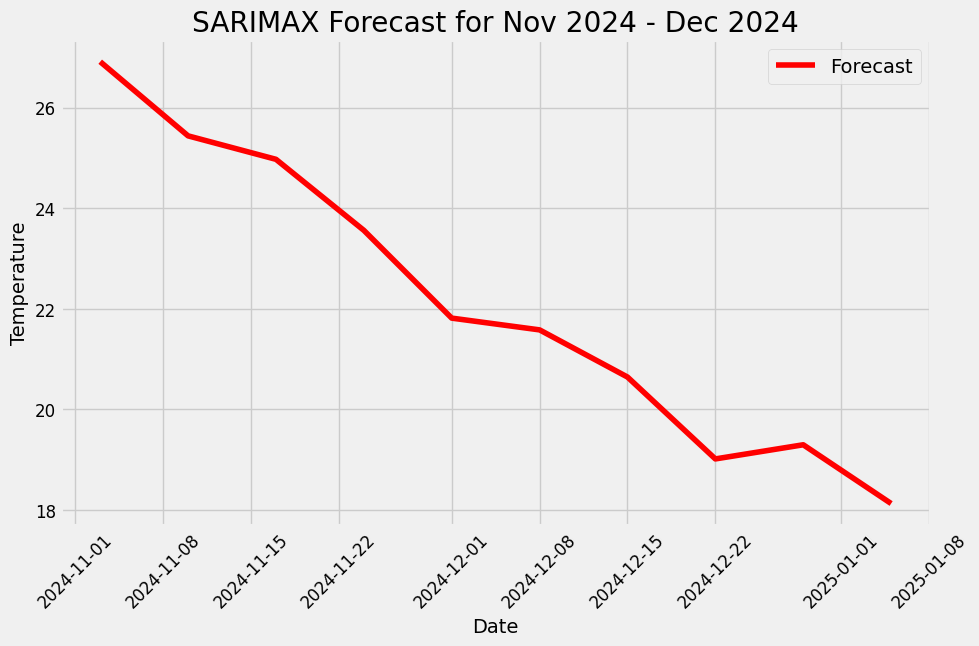

In [16]:
# Step 3: Fit the SARIMAX model on the entire dataset (2021-2023)
model = SARIMAX(weekly_data, order=(0,0,0), 
                seasonal_order=(1,1,1,52))
model_fit = model.fit()

# Forecast future values
preds = model_fit.predict(start=pd.to_datetime("2024-11-01"), end=pd.to_datetime("2024-12-31"))
print(f"Predictions:\n {preds}")

# Step 5: Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(preds.index, preds, label='Forecast', color='red')

plt.title(f'SARIMAX Forecast for Nov 2024 - Dec 2024')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Part 10: Forecast with Machine Learning


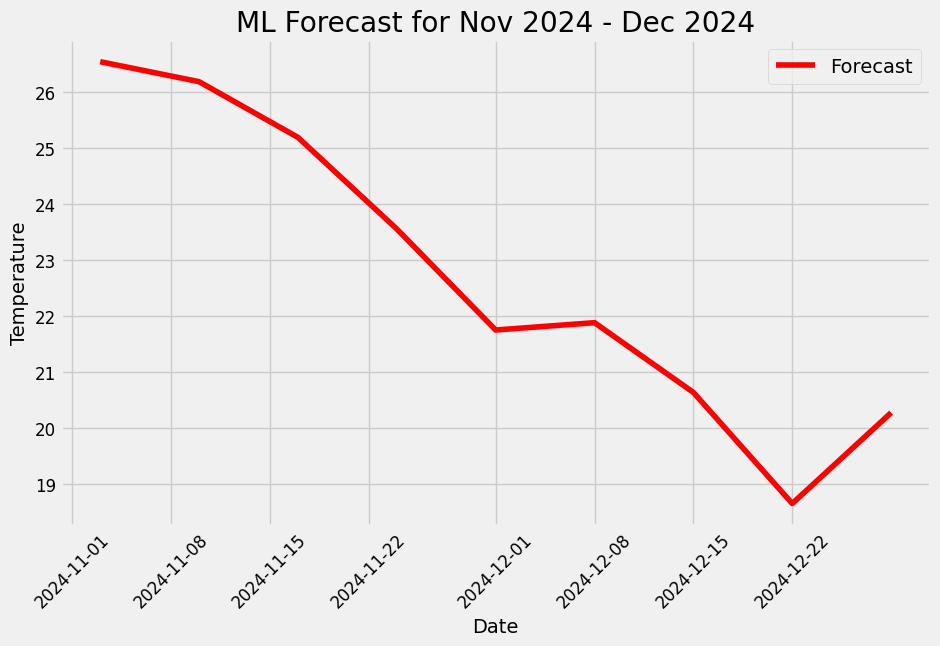

In [17]:
# Extract day, month, and year from the test set
future_months = [x.month for x in future_dates]
future_years = [x.year for x in future_dates]
future_days = [x.day for x in future_dates]

ftestX = np.array([future_days, future_months, future_years]).T

predictions = rfmodel.predict(ftestX)

plt.figure(figsize=(10, 6))
plt.plot(future_dates, predictions, label='Forecast', color='red')

plt.title(f'ML Forecast for Nov 2024 - Dec 2024')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Part 11: Forecast Comparision


For the SARIMA's prediction, from the get go it can noticed that predicted temperatures in Nov-Dec 24 look really accurate compared to that in previous years around the same timeline since the readings are in mid 20s and decreasing, as expected in winters. This shows that SARIMA is a good option for forecasting with a gap in the learning data, and test data. It perfectly identifies the gap in timeline, and outputs temperature for the given time range. Moreover, it also captures the variations that can occur on a week to week basis, such as one week in November may not be as cold as the other, it wouldn't always be a linear change.

On the other hand, Random Forest's predictions also look very accurate since the temperature is in mid to low 20s as expected in winters. This is a testament to the fact that ML models are capable of learning complex patterns by using historical data, and in this case, our model was able to correctly identify the timeline for which the forecast was needed, and the temperature values closely resemble that of the previous years during the same timeline of November-December. There is a small increase in late December but this can be attributed to weekly variations in temperature.

Overall, both models perform well with predicting future temperatures. However, if pinned up against the temperatures that have been recorded so far in November 2024, both the models are not that accurate since the actual temperatures recorded have been around mid 30s. This shows that our models are not as complex and simply making predictions based off of past temperature data does not provide the models enough information to detect the changing cilmate. In order to improve the performance of thees models, we need to incorporate other factors/variables that can indicate climate change or just in general communicate more information than simply the only single temperature value.
